<a href="https://colab.research.google.com/github/LaxmanGhadi/ColabProjectsBeginners/blob/main/DL_Project_8_Skin_Cancer_Pred_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
from skimage.io import imread
from keras.applications.vgg16 import preprocess_input

In [ ]:
!mkdir -p ~/.kaggle
!cp  kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d farjanakabirsamanta/skin-cancer-dataset

100% 2.58G/2.58G [00:20<00:00, 98.5MB/s]
100% 2.58G/2.58G [00:20<00:00, 136MB/s] 


In [ ]:
zip_file = zipfile.ZipFile('/content/skin-cancer-dataset.zip')
zip_file.extractall('/content')
zip_file.close()

In [ ]:
df  = pd.read_csv('/content/HAM10000_metadata.csv')

In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
base_dir = '/content/Skin Cancer/Skin Cancer/'

In [ ]:
Skin_Can = os.listdir(base_dir)

In [ ]:
Skin_Can[0]

'ISIC_0033734.jpg'

In [ ]:
def show_img (i):
  img_pth = os.path.join(base_dir,Skin_Can[i])
  img_read  = imread(img_pth)
  img = plt.imshow(img_read)
  print(img_pth)

/content/Skin Cancer/Skin Cancer/ISIC_0026207.jpg


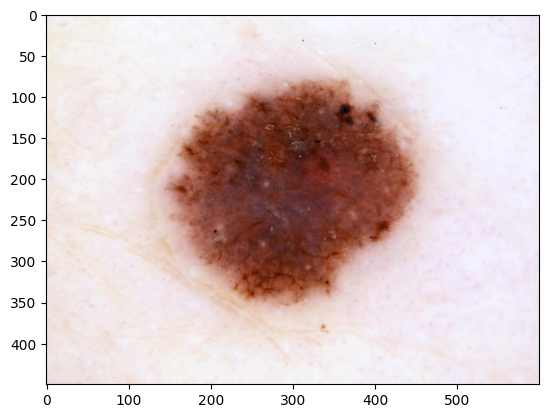

In [ ]:
show_img(1)

balance train - test, validation

ba

In [ ]:
cncr_types  = []
for i in df['dx']:
  if i not in cncr_types:
    cncr_types.append(i)

In [ ]:
print(cncr_types)

['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']


In [ ]:
typ_and_per = []
for typ in cncr_types:
  num = 0
  for i in df['dx']:
    if i == typ:
      num +=1
  print(f'there are {num} image of type {typ} cancer')
  print(f'5% of image in {typ} category are {round(num*0.05,0)}')
  typ_per = typ,round(num*0.05,0)
  typ_and_per.append(typ_per)

there are 1099 image of type bkl cancer
5% of image in bkl category are 55.0
there are 6705 image of type nv cancer
5% of image in nv category are 335.0
there are 115 image of type df cancer
5% of image in df category are 6.0
there are 1113 image of type mel cancer
5% of image in mel category are 56.0
there are 142 image of type vasc cancer
5% of image in vasc category are 7.0
there are 514 image of type bcc cancer
5% of image in bcc category are 26.0
there are 327 image of type akiec cancer
5% of image in akiec category are 16.0


In [ ]:
typ_and_per

[('bkl', 55.0),
 ('nv', 335.0),
 ('df', 6.0),
 ('mel', 56.0),
 ('vasc', 7.0),
 ('bcc', 26.0),
 ('akiec', 16.0)]

In [ ]:
df.loc[4]

lesion_id        HAM_0001466
image_id        ISIC_0031633
dx                       bkl
dx_type                histo
age                     75.0
sex                     male
localization             ear
Name: 4, dtype: object

In [ ]:
test_df_list  =  []
for typ,per in typ_and_per:
  typ_df  = df.loc[df['dx'] == ('bkl')]
  for i in range (0,int(per)):
    df_row = typ_df.iloc[i]
    test_df_list.append(df_row )

In [ ]:
test_df = pd.DataFrame(test_df_list)

In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
64,HAM_0001751,ISIC_0024698,nv,consensus,70.0,male,face
336,HAM_0000745,ISIC_0027796,bkl,histo,70.0,female,lower extremity
337,HAM_0007621,ISIC_0024626,bkl,histo,70.0,male,back
338,HAM_0007621,ISIC_0031321,bkl,histo,70.0,male,back
339,HAM_0002988,ISIC_0025337,bkl,histo,35.0,male,face


In [ ]:
test_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
11,HAM_0004234,ISIC_0029396,bkl,histo,85.0,female,chest
12,HAM_0004234,ISIC_0025984,bkl,histo,85.0,female,chest
13,HAM_0001949,ISIC_0025767,bkl,histo,70.0,male,trunk
14,HAM_0001949,ISIC_0032417,bkl,histo,70.0,male,trunk


In [ ]:
data = df.loc[df['dx'] == ('bkl')]

In [ ]:
data.iloc[0]

lesion_id        HAM_0000118
image_id        ISIC_0027419
dx                       bkl
dx_type                histo
age                     80.0
sex                     male
localization           scalp
Name: 0, dtype: object

In [ ]:
len(df)

10015

In [ ]:
for i in test_df['image_id']:
  df.drop(df[df['image_id'] == i].index , inplace =True)


In [ ]:
len(df)

9680

In [ ]:
Img_Data_Gen = ImageDataGenerator (
    vertical_flip= True,
    horizontal_flip = True,
    shear_range = 0.01,
    height_shift_range = 0.09,
    width_shift_range = 0.09,
    zoom_range  = 0.01,
    # preprocessing_function = preprocess_input
)

In [ ]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,fileName
64,HAM_0001751,ISIC_0024698,nv,consensus,70.0,male,face,ISIC_0024698.jpg
336,HAM_0000745,ISIC_0027796,bkl,histo,70.0,female,lower extremity,ISIC_0027796.jpg
337,HAM_0007621,ISIC_0024626,bkl,histo,70.0,male,back,ISIC_0024626.jpg
338,HAM_0007621,ISIC_0031321,bkl,histo,70.0,male,back,ISIC_0031321.jpg
339,HAM_0002988,ISIC_0025337,bkl,histo,35.0,male,face,ISIC_0025337.jpg
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,ISIC_0032854.jpg


In [ ]:
df['fileName'] = df['image_id'].map(lambda x : str(x)+'.jpg')


In [ ]:
test_df['fileName'] = test_df['image_id'].map(lambda x : str(x)+'.jpg')

In [ ]:
type(test_df)

pandas.core.frame.DataFrame

In [ ]:
target_siz = (256,256)
train_gen = Img_Data_Gen.flow_from_dataframe(
    dataframe = df,
    directory = '/content/Skin_Cancer/Skin_Cancer/',
    x_col = 'fileName',
    y_col = 'dx',
    class_mode = 'categorical',
    color_mode = 'rgb',
    target_size = target_siz,
    batch_size = 32,
    # validate_filenames=False
)

Found 9680 validated image filenames belonging to 7 classes.


In [ ]:
test_gen = Img_Data_Gen.flow_from_dataframe(
    dataframe = test_df,
    directory = '/content/Skin_Cancer/Skin_Cancer/',
    x_col = 'fileName',
    y_col = 'dx',
    class_mode = 'categorical',
    color_mode = 'rgb',
    target_size = target_siz,
    # batch_size = 32,
    # validate_filenames=False
)

Found 501 validated image filenames belonging to 1 classes.


In [ ]:
x,y = next(test_gen)

In [ ]:
x.shape

(32, 256, 256, 3)

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D,Dense, Flatten,Dropout

In [ ]:
model = keras.Sequential([
    Conv2D(32,(1,1),input_shape = (256,256,3) ),
    Conv2D(32,(1,1),activation = 'relu'),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    Conv2D(64,(1,1),activation = 'relu'),
    Conv2D(64,(1,1),activation = 'relu'),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    Conv2D(128,(1,1),activation = 'relu'),
    Conv2D(128,(1,1),activation = 'relu'),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    Flatten(),
    Dense(128, activation ='relu'),
    Dropout(0.1),
    Dense(64, activation ='relu'),
    Dense(7, activation = 'sigmoid'),
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 256, 256, 32)      128       
                                                                 
 conv2d_38 (Conv2D)          (None, 256, 256, 32)      1056      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 128, 128, 64)      2112      
                                                                 
 conv2d_40 (Conv2D)          (None, 128, 128, 64)      4160      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                 

In [ ]:
model.compile(optimizer= 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

Er_Stp = EarlyStopping(monitor ='val_accuracy', min_delta = 0.1 , patience =3 ,verbose =1)

Mod_Chk_pt = ModelCheckpoint(filepath = 'pn_model.h5',
                             monitor ='val_accuracy',
                             min_delta =0.1 , patience = 3,
                             verbose = 1,
                             save_best_only = True)
cal_bks = [Er_Stp,Mod_Chk_pt]

In [ ]:
history = model.fit(train_gen ,
                    epochs = 20,
                    steps_per_epoch = 16,
                    verbose = 1,
                    callbacks = cal_bks,
                    validation_data = test_gen,
                    validation_steps = 16)

Epoch 1/20
16/16 [==============================] - ETA: 0s - loss: 36.8419 - accuracy: 0.4531
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to pn_model.h5
16/16 [==============================] - 36s 2s/step - loss: 36.8419 - accuracy: 0.4531 - val_loss: 44.5074 - val_accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - ETA: 0s - loss: 1.8556 - accuracy: 0.5977
Epoch 2: val_accuracy did not improve from 0.00000
16/16 [==============================] - 27s 2s/step - loss: 1.8556 - accuracy: 0.5977 - val_loss: 27.6895 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - ETA: 0s - loss: 1.2307 - accuracy: 0.5898
Epoch 3: val_accuracy did not improve from 0.00000
16/16 [==============================] - 27s 2s/step - loss: 1.2307 - accuracy: 0.5898 - val_loss: 17.6461 - val_accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - ETA: 0s - loss: 1.0399 - accuracy: 0.6719
Epoch 4: val_accuracy did not improve